In [1]:
import numpy as np
import pandas as pd
import polars as pl
import sys
import re
import os
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


pd.set_option('display.max_columns',None)
import psycopg2


#to scale the data using z-score 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#Algorithms to use
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

import warnings
warnings.filterwarnings("ignore")

#importing PCA and TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Specificity

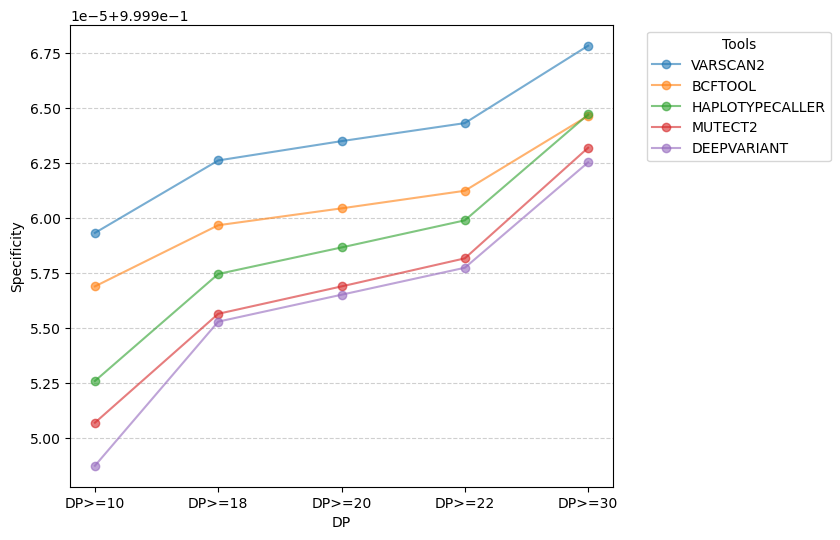

In [37]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"]
Specificity = [
    [0.999959315, 0.999962612, 0.999963491, 0.999964311, 0.999967832],
    [0.999956881, 0.999959664, 0.999960432, 0.999961232, 0.999964644],
    [0.999952578, 0.999957446, 0.999958653, 0.999959886, 0.999964703],
    [0.999950678, 0.999955634, 0.99995688, 0.999958157, 0.99996319],
    [0.999948721, 0.999955277, 0.999956502, 0.999957729, 0.999962524]
]

# Create a single figure
plt.figure(figsize=(7, 6))

for i in range(len(sample_names)):
    plt.plot(range(len(tools)), Specificity[i], marker='o', label=f'{sample_names[i]}', alpha=0.6)

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Specificity')
plt.title('')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("Tools")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/new_input_sample/new_bwa_files/new_visualizations_03_11_2023/Overall_Specificity_0.001_VAF.png', dpi=450, bbox_inches='tight')
plt.show()

# Sensitivity

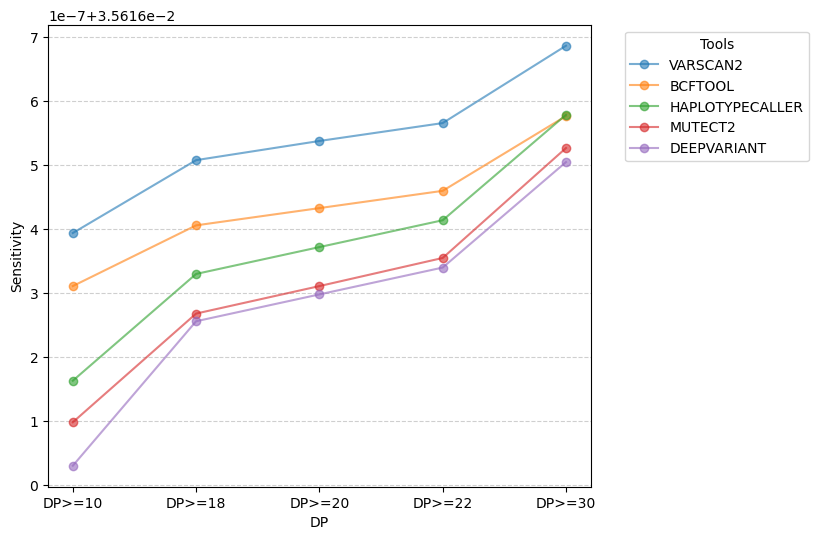

In [38]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"]
Sensitivity = [
    [0.035616394, 0.035616508, 0.035616538, 0.035616566, 0.035616687],
    [0.035616311, 0.035616406, 0.035616433, 0.03561646, 0.035616577],
    [0.035616163, 0.03561633, 0.035616372, 0.035616414, 0.035616579],
    [0.035616098, 0.035616268, 0.035616311, 0.035616355, 0.035616527],
    [0.03561603, 0.035616256, 0.035616298, 0.03561634, 0.035616505]
]

# Create a single figure
plt.figure(figsize=(7, 6))

for i in range(len(sample_names)):
    plt.plot(range(len(tools)), Sensitivity[i], marker='o', label=f'{sample_names[i]}', alpha=0.6)

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Sensitivity')
plt.title('')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("Tools")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/new_input_sample/new_bwa_files/new_visualizations_03_11_2023/Overall_Sensitivity_0.001_VAF.png', dpi=450, bbox_inches='tight')
plt.show()

# All samples Specificity

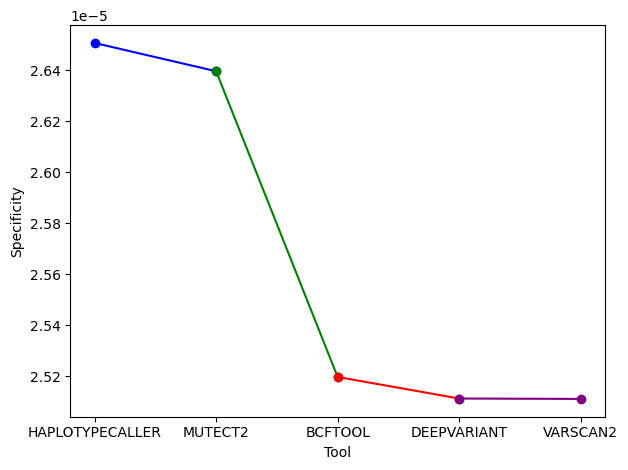

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["HAPLOTYPECALLER", "MUTECT2", "BCFTOOL", "DEEPVARIANT", "VARSCAN2"],
    "Specificity": [0.0000265063251134942, 0.0000263955294386954, 0.0000251969847324033, 0.000025112424017798, 0.0000251108572198479]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Specificity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Specificity")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_0.1_DP15_Specificity_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

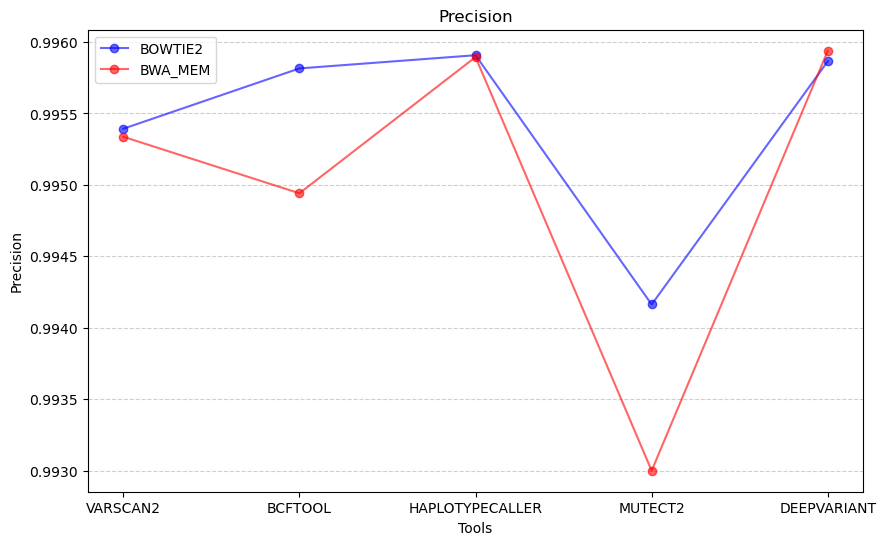

In [18]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"]
sample_names = ["Sample 1"]

Specificity_BOWTIE2 = [
    [0.995393155, 0.995815396, 0.995907728, 0.994163425, 0.995865685]
]
Specificity_BWA_MEM = [
    [0.995337165, 0.994941576, 0.995894883, 0.992999941, 0.995939223]
]

# Create a single subplot for one sample
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# Plot a line for specificity
ax.plot(range(len(tools)), Specificity_BOWTIE2[0], marker='o', label='BOWTIE2', color='b', alpha=0.6)

# Plot a line for sensitivity
ax.plot(range(len(tools)), Specificity_BWA_MEM[0], marker='o', label='BWA_MEM', color='r', alpha=0.6)

# Add labels and a legend
ax.set_xticks(range(len(tools)))
ax.set_xticklabels(tools)
ax.set_xlabel('Tools')
ax.set_ylabel('Precision')
ax.set_title("Precision")
ax.legend()

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_MEM_Bowtie2_Precision_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

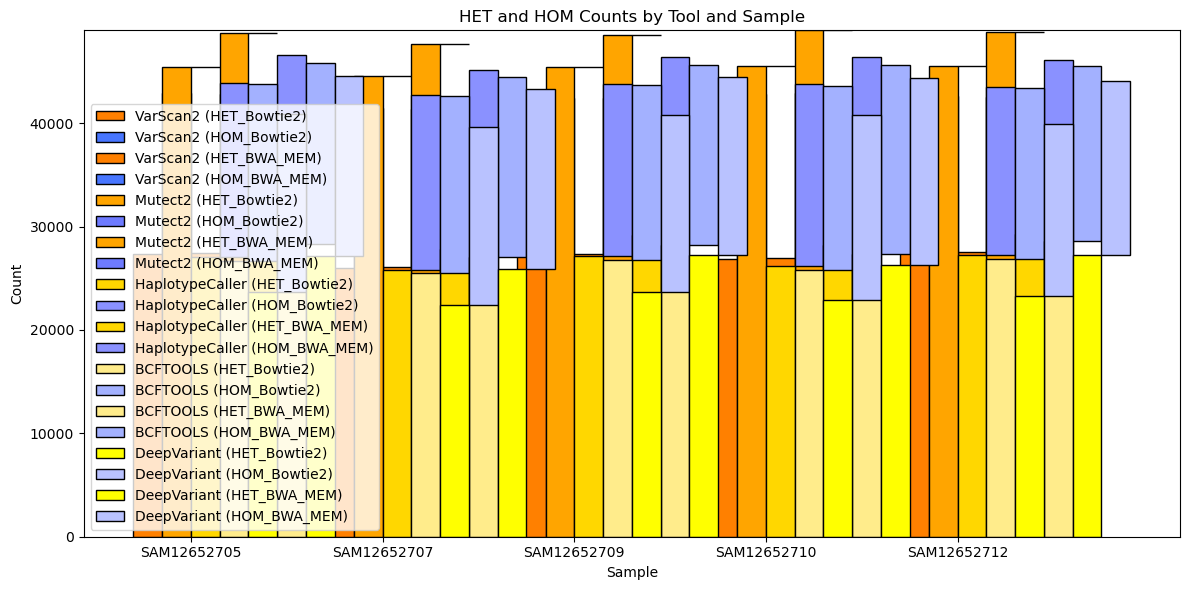

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Your data
data = {
    "Sample": ["SAM12652705", "SAM12652705", "SAM12652705", "SAM12652705", "SAM12652705",
               "SAM12652707", "SAM12652707", "SAM12652707", "SAM12652707", "SAM12652707",
               "SAM12652709", "SAM12652709", "SAM12652709", "SAM12652709", "SAM12652709",
               "SAM12652710", "SAM12652710", "SAM12652710", "SAM12652710", "SAM12652710",
               "SAM12652712", "SAM12652712", "SAM12652712", "SAM12652712", "SAM12652712"],
    "Tool": ["VarScan2", "Mutect2", "HaplotypeCaller", "BCFTOOLS", "DeepVariant",
             "VarScan2", "Mutect2", "HaplotypeCaller", "BCFTOOLS", "DeepVariant",
             "VarScan2", "Mutect2", "HaplotypeCaller", "BCFTOOLS", "DeepVariant",
             "VarScan2", "Mutect2", "HaplotypeCaller", "BCFTOOLS", "DeepVariant",
             "VarScan2", "Mutect2", "HaplotypeCaller", "BCFTOOLS", "DeepVariant"],
    "HET_Bowtie2": [27315, 45443, 27059, 26703, 23653,
                    26031, 44566, 25829, 25472, 22392,
                    27274, 45451, 27152, 26771, 23661,
                    26848, 45499, 26165, 25782, 22886,
                    27522, 45522, 27207, 26848, 23249],
    "HOM_Bowtie2": [15583, 0, 16804, 17081, 17216,
                    15421, 0, 16859, 17126, 17232,
                    15131, 0, 16658, 16928, 17115,
                    16013, 0, 17590, 17841, 17915,
                    15143, 0, 16342, 16595, 16707],
    "HET_BWA_MEM": [27401, 48703, 29146, 28288, 27145,
                    26086, 47687, 27839, 27026, 25927,
                    27383, 48519, 29140, 28265, 27264,
                    27008, 48983, 28222, 27344, 26257,
                    27513, 48814, 29235, 28558, 27247],
    "HOM_BWA_MEM": [15456, 0, 17431, 17524, 17412,
                    15335, 0, 17338, 17449, 17347,
                    15071, 0, 17242, 17348, 17232,
                    15926, 0, 18152, 18244, 18109,
                    15041, 0, 16893, 16972, 16863]
}

df = pd.DataFrame(data)

# Create unique x-values for each sample
samples = df['Sample'].unique()
x = np.arange(len(samples))

# Width of each bar
bar_width = 0.15  # Adjust the bar width as needed

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Define custom colors for HET and HOM counts
het_colors = ['#FF8000', '#FFA500', '#FFD700', '#FFEC8B', '#FFFF00']
hom_colors = ['#4876FF', '#6E7BFF', '#8A91FF', '#A3B1FF', '#B9C2FF']

# Grouped bar chart for each tool (HET and HOM counts)
tools = df['Tool'].unique()
for i, tool in enumerate(tools):
    het_counts_bowtie2 = df[(df['Tool'] == tool)]['HET_Bowtie2']
    hom_counts_bowtie2 = df[(df['Tool'] == tool)]['HOM_Bowtie2']
    het_counts_bwa_mem = df[(df['Tool'] == tool)]['HET_BWA_MEM']
    hom_counts_bwa_mem = df[(df['Tool'] == tool)]['HOM_BWA_MEM']

    ax.bar(x - 1.5 * bar_width + i * bar_width, het_counts_bowtie2, bar_width, label=f'{tool} (HET_Bowtie2)', color=het_colors[i], edgecolor='black')
    ax.bar(x - 0.5 * bar_width + i * bar_width, hom_counts_bowtie2, bar_width, label=f'{tool} (HOM_Bowtie2)', bottom=het_counts_bowtie2, color=hom_colors[i], edgecolor='black')
    ax.bar(x + 0.5 * bar_width + i * bar_width, het_counts_bwa_mem, bar_width, label=f'{tool} (HET_BWA_MEM)', color=het_colors[i], edgecolor='black')
    ax.bar(x + 1.5 * bar_width + i * bar_width, hom_counts_bwa_mem, bar_width, label=f'{tool} (HOM_BWA_MEM)', bottom=het_counts_bwa_mem, color=hom_colors[i], edgecolor='black')

# Customize the plot
ax.set_xlabel('Sample')
ax.set_ylabel('Count')
ax.set_title("HET and HOM Counts by Tool and Sample")
ax.set_xticks(x)
ax.set_xticklabels(samples)

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=0)

# Show the legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

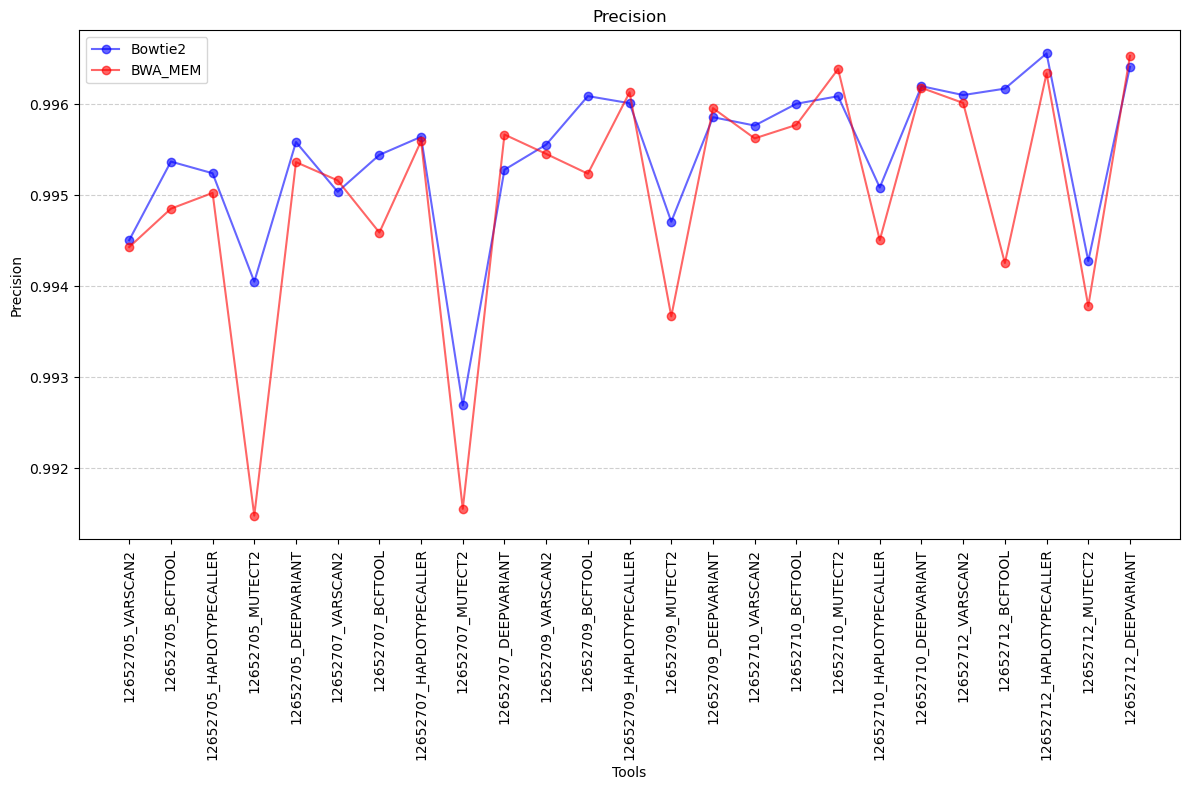

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

# Data from the table
tools = ["12652705_VARSCAN2", "12652705_BCFTOOL", "12652705_HAPLOTYPECALLER", "12652705_MUTECT2", "12652705_DEEPVARIANT", "12652707_VARSCAN2", "12652707_BCFTOOL", "12652707_HAPLOTYPECALLER", "12652707_MUTECT2", "12652707_DEEPVARIANT", "12652709_VARSCAN2", "12652709_BCFTOOL", "12652709_HAPLOTYPECALLER", "12652709_MUTECT2", "12652709_DEEPVARIANT", "12652710_VARSCAN2", "12652710_BCFTOOL", "12652710_MUTECT2", "12652710_HAPLOTYPECALLER", "12652710_DEEPVARIANT", "12652712_VARSCAN2", "12652712_BCFTOOL", "12652712_HAPLOTYPECALLER", "12652712_MUTECT2", "12652712_DEEPVARIANT"]
Bowtie2_Sensitivity = [0.994506543, 0.99536965, 0.995241653, 0.994050902, 0.995584239, 0.995038122, 0.995443265, 0.995641806, 0.992692939, 0.995280289, 0.995555729, 0.996088861, 0.996010743, 0.994710039, 0.995857003, 0.995765298, 0.996004655, 0.996087331, 0.995084845, 0.996197558, 0.996100085, 0.996170549, 0.996557108, 0.994278398, 0.996409336]
BWA_MEM_Sensitivity = [0.994431094, 0.994852437, 0.995025779, 0.991482547, 0.995363629, 0.995162851, 0.994590696, 0.995595383, 0.991557009, 0.995666479, 0.995454016, 0.99523662, 0.996130116, 0.993670191, 0.99595625, 0.995624548, 0.995772395, 0.996385194, 0.994506884, 0.996179269, 0.996013315, 0.994255735, 0.996337945, 0.993783074, 0.996530485]

# Combine the data into a single DataFrame
data = {
    "Tool": tools,
    "Bowtie2_Sensitivity": Bowtie2_Sensitivity,
    "BWA_MEM_Sensitivity": BWA_MEM_Sensitivity
}
df = pd.DataFrame(data)

# Create a single subplot for the graph
fig, ax = plt.subplots(figsize=(12, 8))

# Plot lines for Bowtie2 Sensitivity
ax.plot(range(len(df)), df["Bowtie2_Sensitivity"], marker='o', label='Bowtie2', color='b', alpha=0.6)

# Plot lines for BWA_MEM Sensitivity
ax.plot(range(len(df)), df["BWA_MEM_Sensitivity"], marker='o', label='BWA_MEM', color='r', alpha=0.6)

# Set x-axis labels
ax.set_xticks(range(len(df)))
ax.set_xticklabels(df["Tool"], rotation=90)

# Add labels and a legend
ax.set_xlabel('Tools')
ax.set_ylabel('Precision')
ax.set_title("Precision")
ax.legend()

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/Individual_Precision.png', dpi=600, bbox_inches='tight')
plt.show()

# All samples Sensitivity

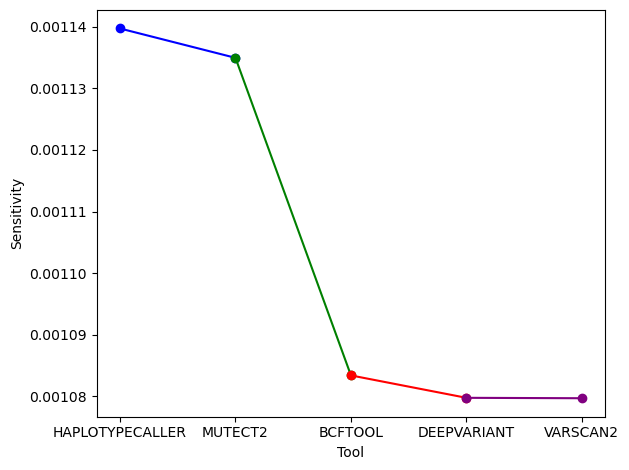

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["HAPLOTYPECALLER", "MUTECT2", "BCFTOOL", "DEEPVARIANT", "VARSCAN2"],
    "Sensitivity": [0.00113971938337704, 0.00113495543732478, 0.00108341896792896, 0.00107978288189614, 0.0010797155469696]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Sensitivity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Sensitivity")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_0.1_DP15_Sensitivity_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

# Specificity for all tools

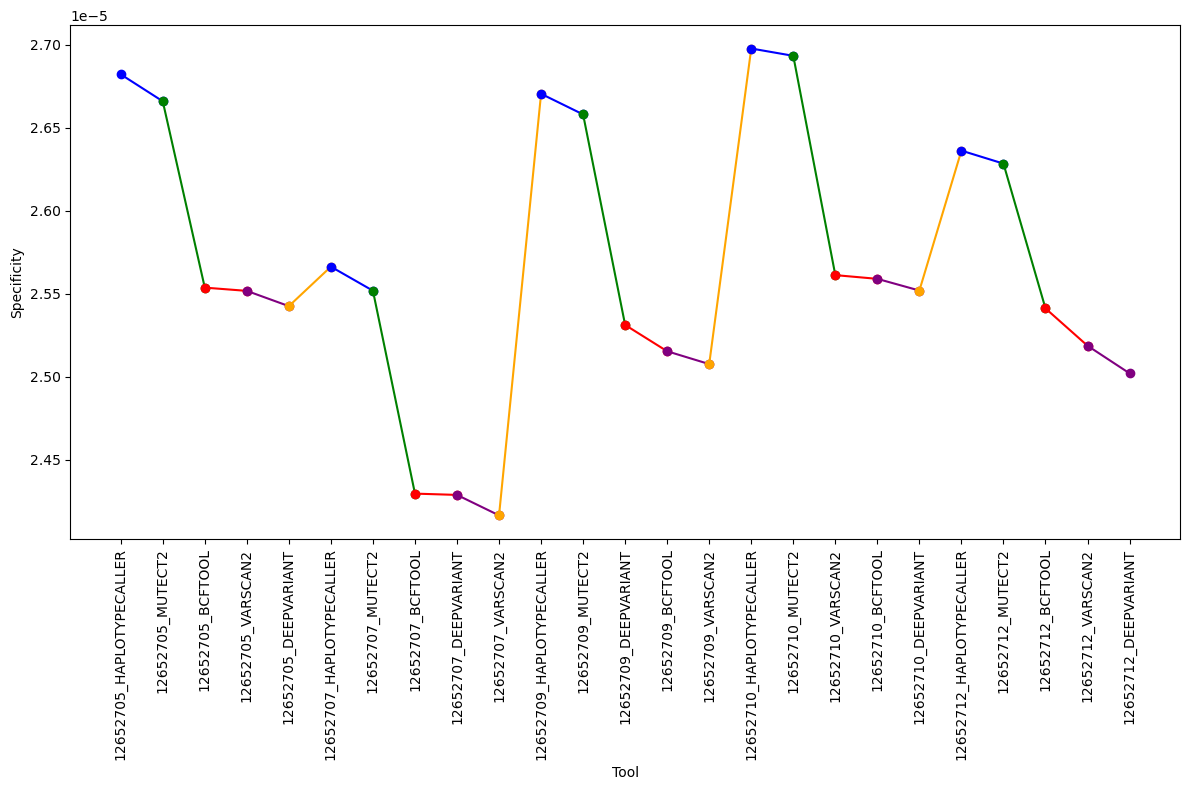

In [28]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_HAPLOTYPECALLER", "12652705_MUTECT2", "12652705_BCFTOOL", "12652705_VARSCAN2", "12652705_DEEPVARIANT", "12652707_HAPLOTYPECALLER", "12652707_MUTECT2", "12652707_BCFTOOL", "12652707_DEEPVARIANT", "12652707_VARSCAN2", "12652709_HAPLOTYPECALLER", "12652709_MUTECT2", "12652709_DEEPVARIANT", "12652709_BCFTOOL", "12652709_VARSCAN2", "12652710_HAPLOTYPECALLER", "12652710_MUTECT2", "12652710_VARSCAN2", "12652710_BCFTOOL", "12652710_DEEPVARIANT", "12652712_HAPLOTYPECALLER", "12652712_MUTECT2", "12652712_BCFTOOL", "12652712_VARSCAN2", "12652712_DEEPVARIANT"],
    "Specificity": [2.68226E-05, 2.66602E-05, 2.55366E-05, 2.5517E-05, 2.5425E-05, 2.56629E-05, 2.5518E-05, 2.42946E-05, 2.42868E-05, 2.41634E-05, 2.67052E-05, 2.65809E-05, 2.53115E-05, 2.51529E-05, 2.50756E-05, 2.69783E-05, 2.69342E-05, 2.5612E-05, 2.55895E-05, 2.5519E-05, 2.63626E-05, 2.62843E-05, 2.54113E-05, 2.51862E-05, 2.50198E-05]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Specificity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Specificity")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_Specificity_0.1_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

# Sensitivity for all tools

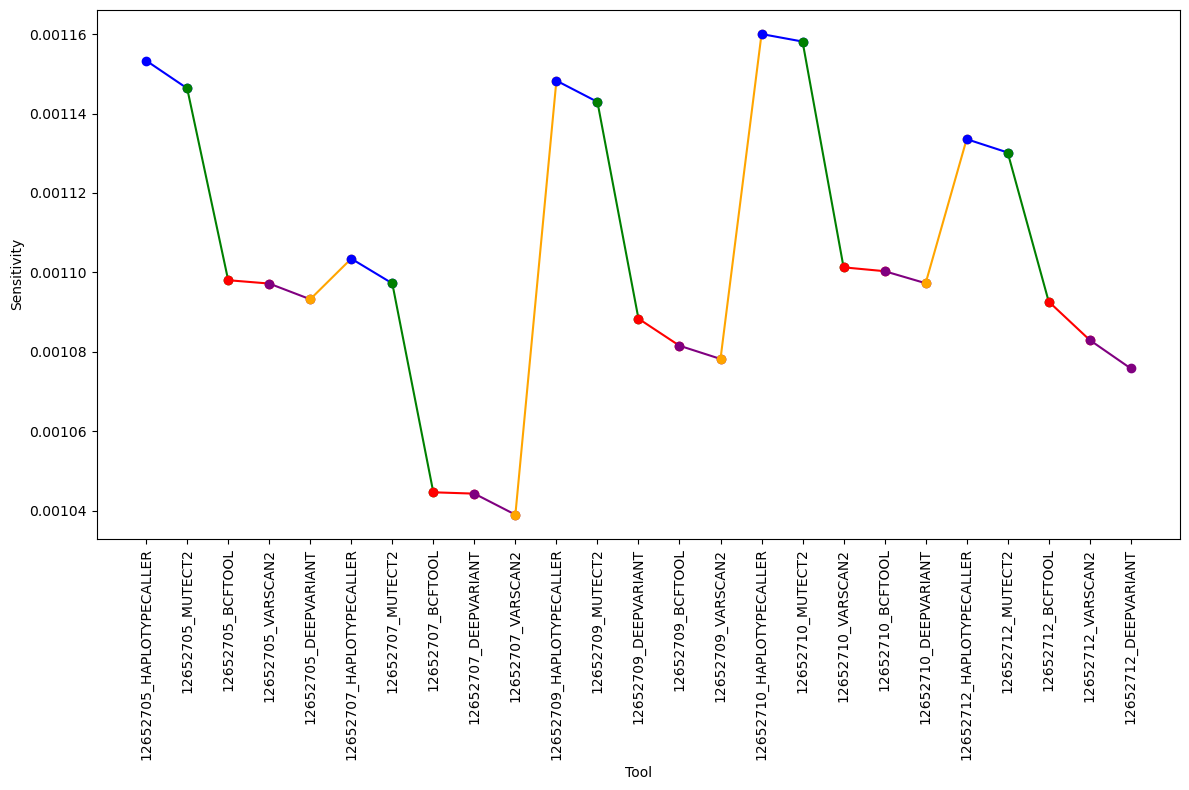

In [29]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_HAPLOTYPECALLER", "12652705_MUTECT2", "12652705_BCFTOOL", "12652705_VARSCAN2", "12652705_DEEPVARIANT", "12652707_HAPLOTYPECALLER", "12652707_MUTECT2", "12652707_BCFTOOL", "12652707_DEEPVARIANT", "12652707_VARSCAN2", "12652709_HAPLOTYPECALLER", "12652709_MUTECT2", "12652709_DEEPVARIANT", "12652709_BCFTOOL", "12652709_VARSCAN2", "12652710_HAPLOTYPECALLER", "12652710_MUTECT2", "12652710_VARSCAN2", "12652710_BCFTOOL", "12652710_DEEPVARIANT", "12652712_HAPLOTYPECALLER", "12652712_MUTECT2", "12652712_BCFTOOL", "12652712_VARSCAN2", "12652712_DEEPVARIANT"],
    "Sensitivity": [0.001153321, 0.001146335, 0.001098022, 0.001097181, 0.001093225, 0.001103451, 0.001097223, 0.001044617, 0.001044281, 0.001038978, 0.001148271, 0.001142926, 0.001088343, 0.001081525, 0.001078201, 0.001160012, 0.001158119, 0.001101263, 0.001100295, 0.001097265, 0.001133541, 0.001130175, 0.001092635, 0.001082956, 0.001075802]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Sensitivity"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Sensitivity")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_Sensitivity_0.1_all_tools.tiff', dpi=600, bbox_inches='tight')
plt.show()

# Specificity vs Sensitivity 

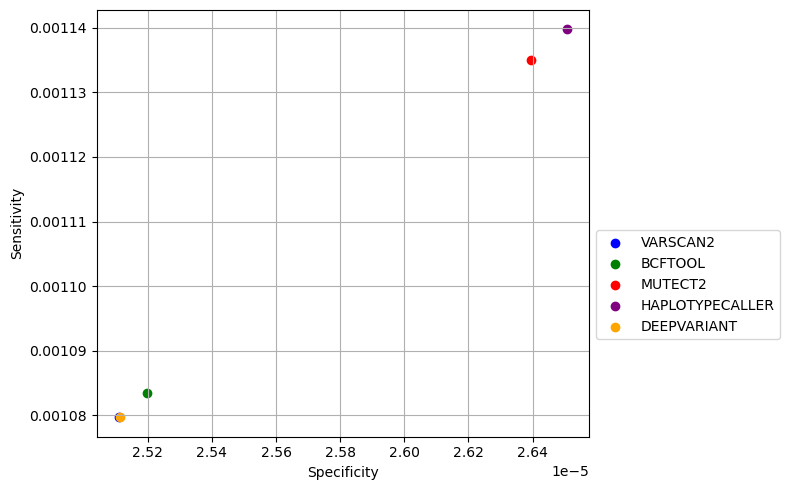

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["VARSCAN2", "BCFTOOL", "MUTECT2", "HAPLOTYPECALLER", "DEEPVARIANT"],
    "Specificity": [2.51109E-05, 2.5197E-05, 2.63955E-05, 2.65063E-05, 2.51124E-05],
    "Sensitivity": [0.001079716, 0.001083419, 0.001134955, 0.001139719, 0.001079783]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(8, 5))

# Create a scatter plot with specificity on the x-axis and sensitivity on the y-axis
for i in range(len(df)):
    plt.scatter(df["Specificity"][i], df["Sensitivity"][i], color=colors[i], marker='o', label=df["Tool"][i])

# Add labels and title
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("")

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/BWA_0.1_Specificity_vs_Sensitivity.tiff', dpi=600, bbox_inches='tight')
plt.show()

# Individual sen vs spe

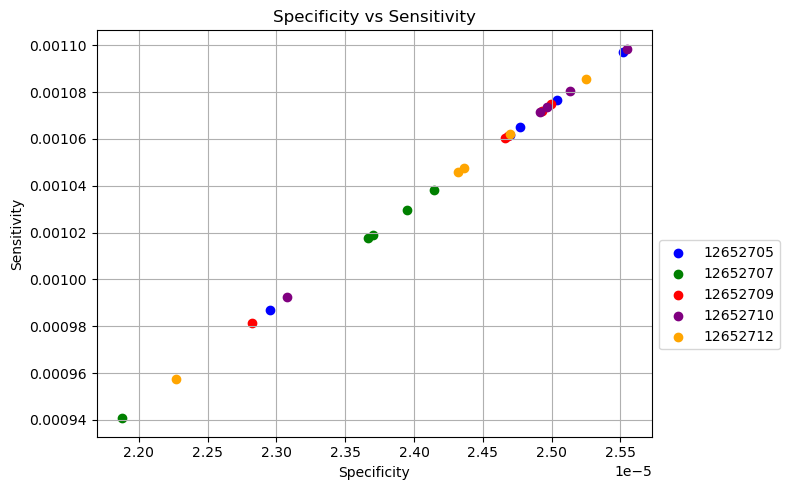

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Sample": [12652705, 12652705, 12652705, 12652705, 12652705, 12652707, 12652707, 12652707, 12652707, 12652707, 12652709, 12652709, 12652709, 12652709, 12652709, 12652710, 12652710, 12652710, 12652710, 12652710, 12652712, 12652712, 12652712, 12652712, 12652712],
    "Tool": ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "MUTECT2", "HAPLOTYPECALLER", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"],
    "Specificity": [2.55151E-05, 2.50375E-05, 2.47703E-05, 2.46949E-05, 2.29498E-05, 2.41419E-05, 2.39471E-05, 2.37015E-05, 2.36682E-05, 2.18781E-05, 2.49944E-05, 2.49269E-05, 2.46812E-05, 2.46616E-05, 2.28206E-05, 2.55464E-05, 2.51314E-05, 2.49670E-05, 2.49171E-05, 2.30780E-05, 2.52489E-05, 2.46969E-05, 2.43641E-05, 2.43220E-05, 2.22716E-05],
    "Sensitivity": [0.001097096, 0.001076559, 0.001065070, 0.001061830, 0.000986793, 0.001038052, 0.001029677, 0.001019114, 0.001017683, 0.000940711, 0.001074708, 0.001071804, 0.001061241, 0.001060399, 0.000981238, 0.001098443, 0.001080599, 0.001073529, 0.001071383, 0.000992306, 0.001085649, 0.001061914, 0.001047605, 0.001045796, 0.000957629]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a single figure
plt.figure(figsize=(8, 5))

# Create a scatter plot for each sample, using a different color for each
samples = df["Sample"].unique()
for i, sample in enumerate(samples):
    sample_data = df[df["Sample"] == sample]
    plt.scatter(sample_data["Specificity"], sample_data["Sensitivity"], color=colors[i], label=f"{sample}")

# Add labels and title
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("Specificity vs Sensitivity")

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()

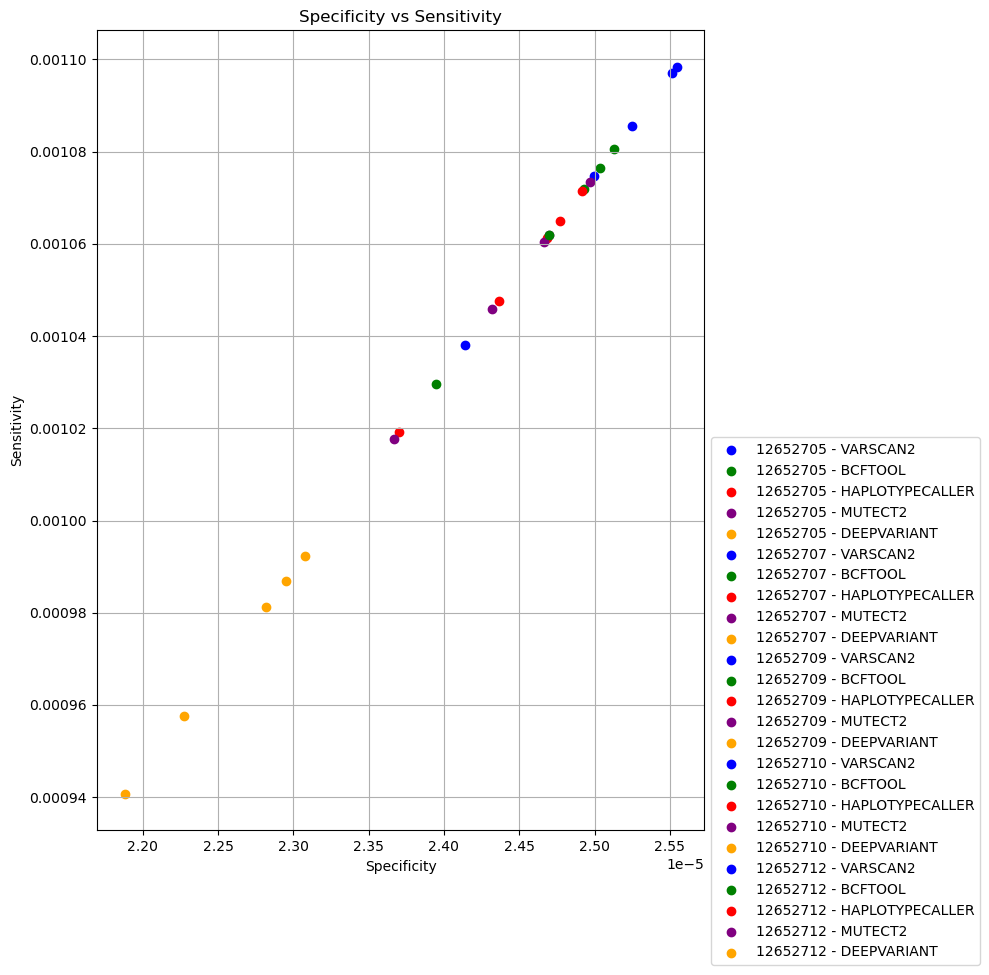

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Sample": [12652705, 12652705, 12652705, 12652705, 12652705, 12652707, 12652707, 12652707, 12652707, 12652707, 12652709, 12652709, 12652709, 12652709, 12652709, 12652710, 12652710, 12652710, 12652710, 12652710, 12652712, 12652712, 12652712, 12652712, 12652712],
    "Tool": ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "MUTECT2", "HAPLOTYPECALLER", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"],
    "Specificity": [2.55151E-05, 2.50375E-05, 2.47703E-05, 2.46949E-05, 2.29498E-05, 2.41419E-05, 2.39471E-05, 2.37015E-05, 2.36682E-05, 2.18781E-05, 2.49944E-05, 2.49269E-05, 2.46812E-05, 2.46616E-05, 2.28206E-05, 2.55464E-05, 2.51314E-05, 2.49670E-05, 2.49171E-05, 2.30780E-05, 2.52489E-05, 2.46969E-05, 2.43641E-05, 2.43220E-05, 2.22716E-05],
    "Sensitivity": [0.001097096, 0.001076559, 0.001065070, 0.001061830, 0.000986793, 0.001038052, 0.001029677, 0.001019114, 0.001017683, 0.000940711, 0.001074708, 0.001071804, 0.001061241, 0.001060399, 0.000981238, 0.001098443, 0.001080599, 0.001073529, 0.001071383, 0.000992306, 0.001085649, 0.001061914, 0.001047605, 0.001045796, 0.000957629]
}

df = pd.DataFrame(data)

# Define a list of unique tools and colors
unique_tools = df["Tool"].unique()
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create a single figure
plt.figure(figsize=(10, 10))

# Create a scatter plot for each sample, using different colors for each tool
samples = df["Sample"].unique()
for i, sample in enumerate(samples):
    sample_data = df[df["Sample"] == sample]
    for j, tool in enumerate(unique_tools):
        tool_data = sample_data[sample_data["Tool"] == tool]
        plt.scatter(tool_data["Specificity"], tool_data["Sensitivity"], color=colors[j], label=f"{sample} - {tool}")

# Add labels and title
plt.xlabel("Specificity")
plt.ylabel("Sensitivity")
plt.title("Specificity vs Sensitivity")

# Add a legend outside the plot
plt.legend(loc='upper left', bbox_to_anchor=(1, 0.5))

# Display the graph
plt.grid(True)
plt.tight_layout()
plt.show()


# Individual Accuracy

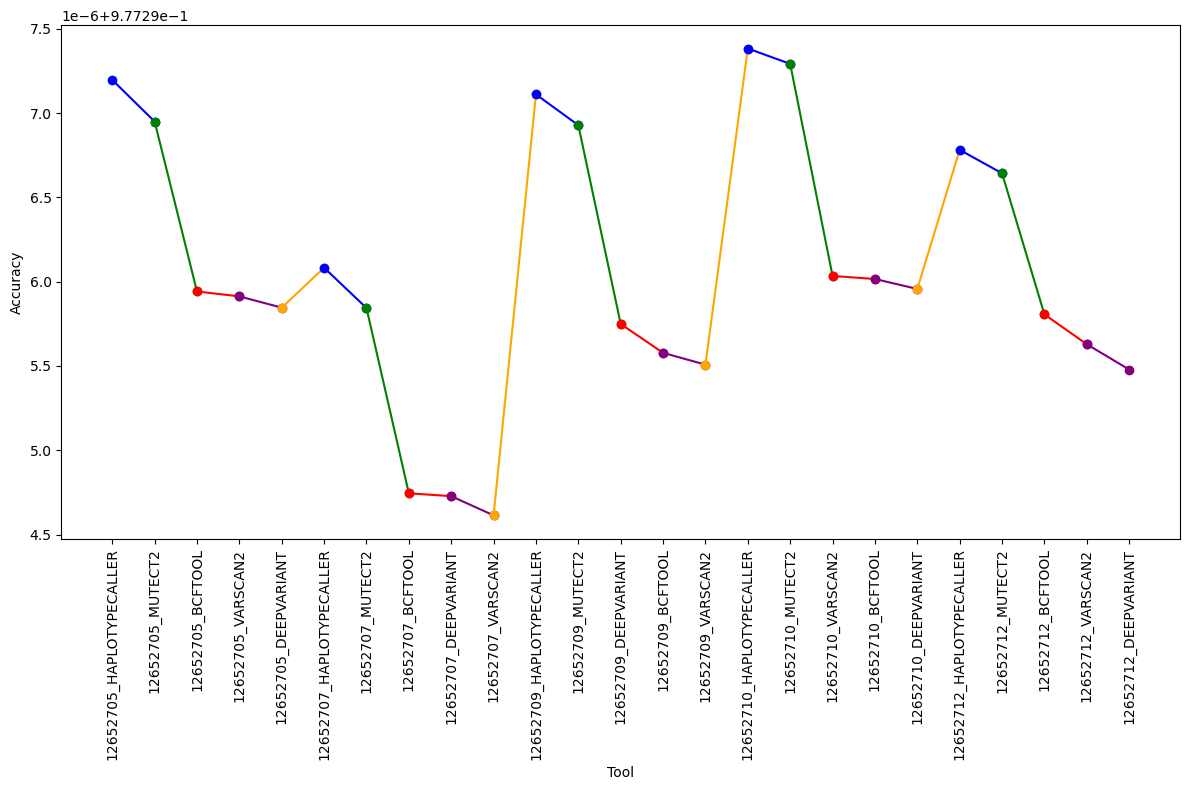

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_HAPLOTYPECALLER", "12652705_MUTECT2", "12652705_BCFTOOL", "12652705_VARSCAN2", "12652705_DEEPVARIANT", "12652707_HAPLOTYPECALLER", "12652707_MUTECT2", "12652707_BCFTOOL", "12652707_DEEPVARIANT", "12652707_VARSCAN2", "12652709_HAPLOTYPECALLER", "12652709_MUTECT2", "12652709_DEEPVARIANT", "12652709_BCFTOOL", "12652709_VARSCAN2", "12652710_HAPLOTYPECALLER", "12652710_MUTECT2", "12652710_VARSCAN2", "12652710_BCFTOOL", "12652710_DEEPVARIANT", "12652712_HAPLOTYPECALLER", "12652712_MUTECT2", "12652712_BCFTOOL", "12652712_VARSCAN2", "12652712_DEEPVARIANT"],
    "Accuracy": [0.977297197, 0.97729695, 0.977295942, 0.977295913, 0.977295846, 0.977296083, 0.977295844, 0.977294745, 0.977294728, 0.977294614, 0.977297111, 0.977296928, 0.977295749, 0.977295578, 0.977295508, 0.977297383, 0.977297292, 0.977296034, 0.977296016, 0.977295957, 0.977296782, 0.977296643, 0.977295806, 0.977295629, 0.977295479]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Accuracy"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Accuracy")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_Accuracy_0.1_all_tools.tiff', dpi=600, bbox_inches='tight')
plt.show()

# Individual Precision

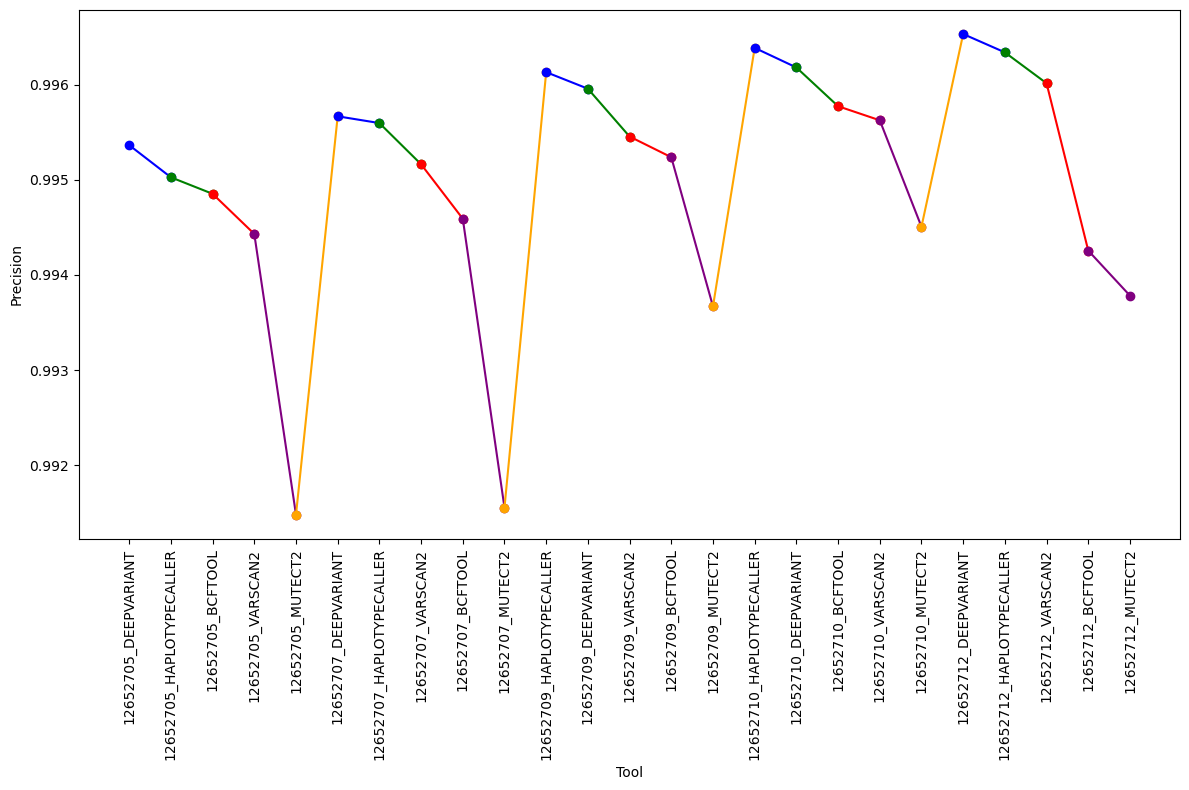

In [36]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_DEEPVARIANT", "12652705_HAPLOTYPECALLER", "12652705_BCFTOOL", "12652705_VARSCAN2", "12652705_MUTECT2", "12652707_DEEPVARIANT", "12652707_HAPLOTYPECALLER", "12652707_VARSCAN2", "12652707_BCFTOOL", "12652707_MUTECT2", "12652709_HAPLOTYPECALLER", "12652709_DEEPVARIANT", "12652709_VARSCAN2", "12652709_BCFTOOL", "12652709_MUTECT2", "12652710_HAPLOTYPECALLER", "12652710_DEEPVARIANT", "12652710_BCFTOOL", "12652710_VARSCAN2", "12652710_MUTECT2", "12652712_DEEPVARIANT", "12652712_HAPLOTYPECALLER", "12652712_VARSCAN2", "12652712_BCFTOOL", "12652712_MUTECT2"],
    "Precision": [0.995363629, 0.995025779, 0.994852437, 0.994431094, 0.991482547, 0.995666479, 0.995595383, 0.995162851, 0.994590696, 0.991557009, 0.996130116, 0.99595625, 0.995454016, 0.99523662, 0.993670191, 0.996385194, 0.996179269, 0.995772395, 0.995624548, 0.994506884, 0.996530485, 0.996337945, 0.996013315, 0.994255735, 0.993783074]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Precision"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Precision")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_Precision_0.1_all_tools.tiff', dpi=600, bbox_inches='tight')
plt.show()

# TPR vs FPR

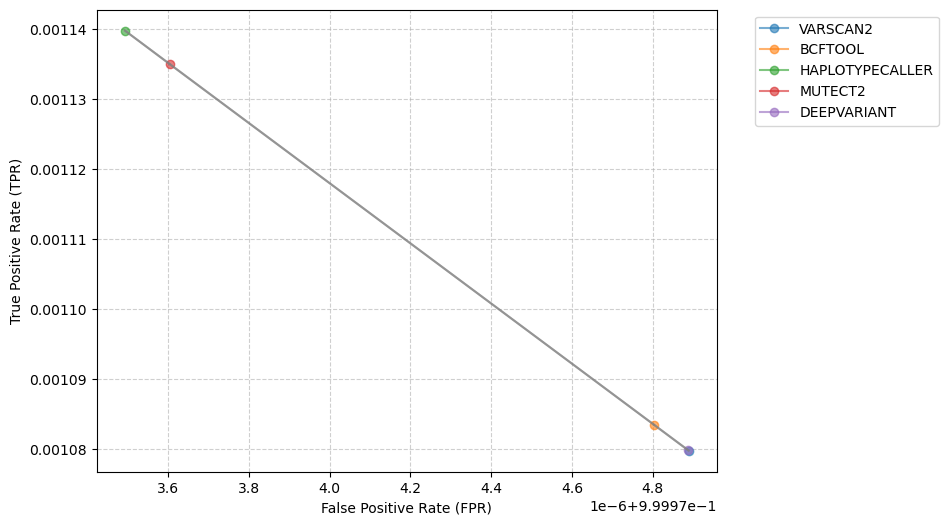

In [21]:
import matplotlib.pyplot as plt

# Data for a single sample
sample_name = "All samples TPR vs FPR"
Tool = ['VARSCAN2', 'BCFTOOL', 'HAPLOTYPECALLER', 'MUTECT2', 'DEEPVARIANT']
TPR = [0.001079716, 0.001083419, 0.001139719, 0.001134955, 0.001079783]
FPR = [0.999974889, 0.999974803, 0.999973494, 0.999973604, 0.999974888]

# Create a single figure
plt.figure(figsize=(8, 6))

# Plot TPR vs. FPR for each tool with lines connecting the dots
for i in range(len(Tool)):
    plt.plot(FPR[i], TPR[i], marker='o', label=Tool[i], alpha=0.6)

# Add lines connecting the dots for each tool
for i in range(len(Tool) - 1):
    plt.plot([FPR[i], FPR[i+1]], [TPR[i], TPR[i+1]], linestyle='-', color='gray', alpha=0.6)

# Add labels and a legend to the right of the plot
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title(f'')
legend = plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1))

# Show the plot
plt.grid(True, linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/BWA_0.1_ROC_TPR_FPR.tiff', dpi=600, bbox_inches='tight')

plt.show()

# Accuracy

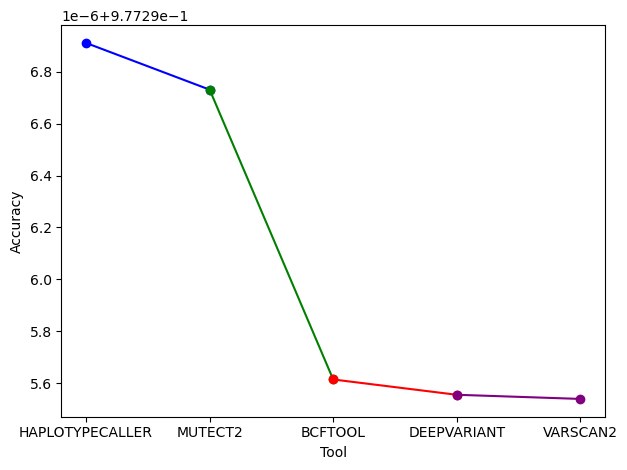

In [35]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["HAPLOTYPECALLER", "MUTECT2", "BCFTOOL", "DEEPVARIANT", "VARSCAN2"],
    "Accuracy": [0.977296911, 0.977296731, 0.977295614, 0.977295555, 0.977295539]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Accuracy"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Accuracy")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_0.1_Accuracy_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

# Precision

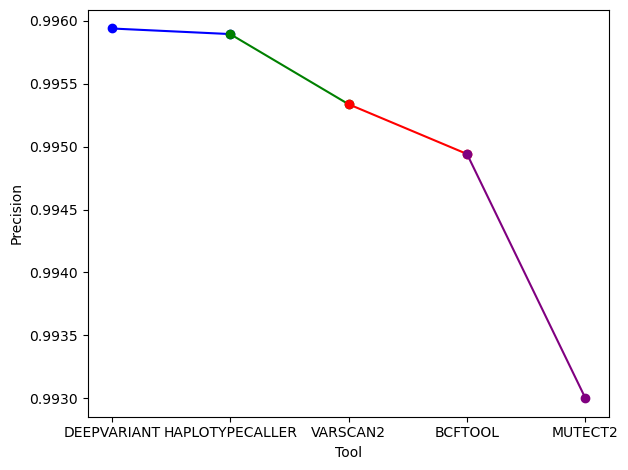

In [37]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["DEEPVARIANT", "HAPLOTYPECALLER", "VARSCAN2", "BCFTOOL", "MUTECT2"],
    "Precision": [0.995939223, 0.995894883, 0.995337165, 0.994941576, 0.992999941]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["Precision"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("Precision")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_0.1_Precision_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

# INDIVIDUAL f1_score

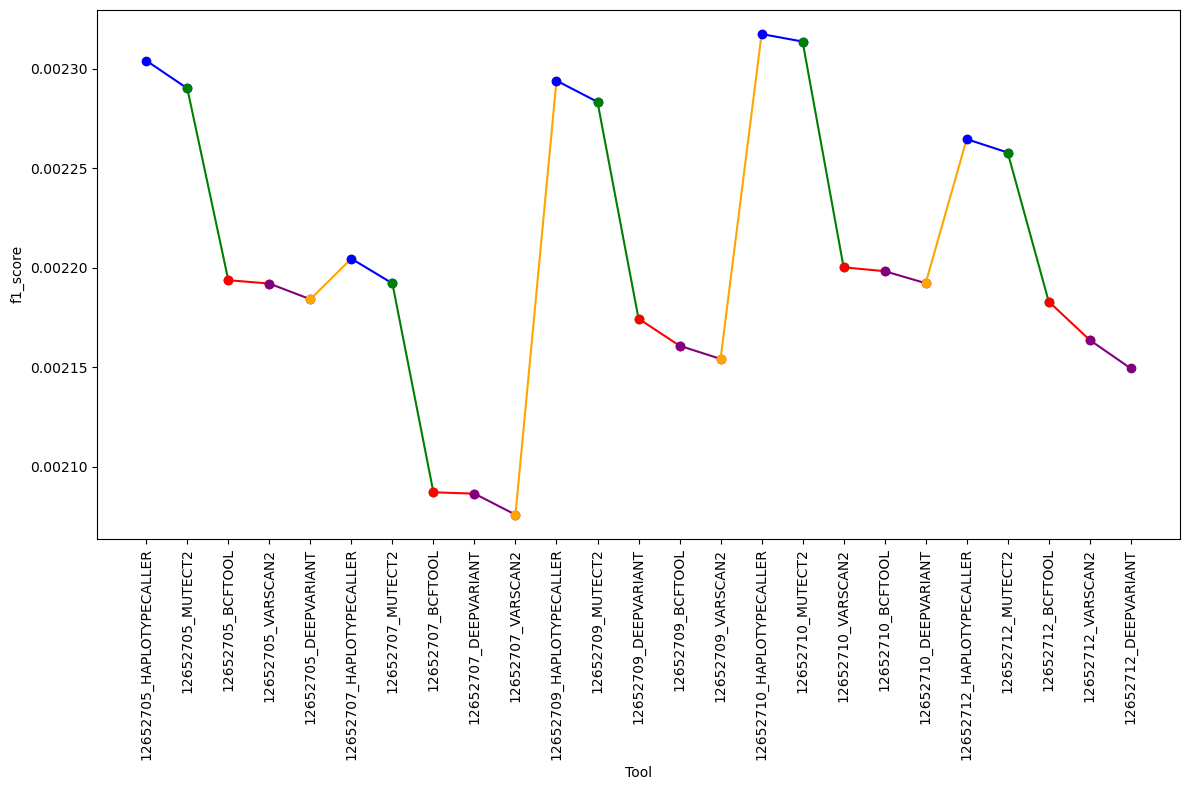

In [38]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["12652705_HAPLOTYPECALLER", "12652705_MUTECT2", "12652705_BCFTOOL", "12652705_VARSCAN2", "12652705_DEEPVARIANT", "12652707_HAPLOTYPECALLER", "12652707_MUTECT2", "12652707_BCFTOOL", "12652707_DEEPVARIANT", "12652707_VARSCAN2", "12652709_HAPLOTYPECALLER", "12652709_MUTECT2", "12652709_DEEPVARIANT", "12652709_BCFTOOL", "12652709_VARSCAN2", "12652710_HAPLOTYPECALLER", "12652710_MUTECT2", "12652710_VARSCAN2", "12652710_BCFTOOL", "12652710_DEEPVARIANT", "12652712_HAPLOTYPECALLER", "12652712_MUTECT2", "12652712_BCFTOOL", "12652712_VARSCAN2", "12652712_DEEPVARIANT"],
    "f1_score": [0.002303972, 0.002290022, 0.002193623, 0.002191943, 0.00218405, 0.002204459, 0.00219202, 0.002087042, 0.002086373, 0.002075789, 0.002293898, 0.002283226, 0.00217431, 0.002160702, 0.002154068, 0.002317327, 0.002313543, 0.002200092, 0.002198161, 0.002192115, 0.002264506, 0.002257782, 0.002182872, 0.00216356, 0.002149283]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange', 'blue', 'green', 'red', 'purple', 'orange']

# Increase the figure dimensions by specifying figsize
plt.figure(figsize=(12, 8))

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["f1_score"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("f1_score")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=90)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_f1_score_0.1_all_tools.tiff', dpi=600, bbox_inches='tight')
plt.show()

# F1_score overall

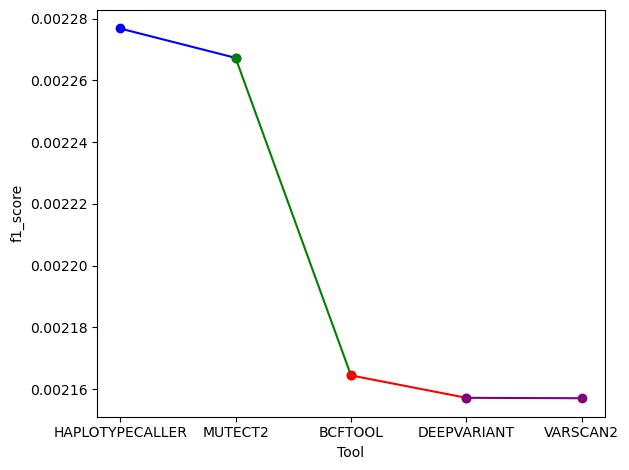

In [39]:
import matplotlib.pyplot as plt
import pandas as pd

data = {
    "Tool": ["HAPLOTYPECALLER", "MUTECT2", "BCFTOOL", "DEEPVARIANT", "VARSCAN2"],
    "f1_score": [0.00227683231619559, 0.00226731861723716, 0.00216448015137249, 0.00215722619753269, 0.00215709015890357]
}

df = pd.DataFrame(data)

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Create the line graph with lines and dots of different colors
for i in range(len(df) - 1):
    plt.plot(df["Tool"][i:i+2], df["f1_score"][i:i+2], marker='o', linestyle='-', color=colors[i])

# Add labels and title
plt.xlabel("Tool")
plt.ylabel("f1_score")
plt.title("")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=0)

# Display the graph
plt.tight_layout()
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_0.1_f1_score_all_samples.tiff', dpi=600, bbox_inches='tight')
plt.show()

# All DP Accuracy

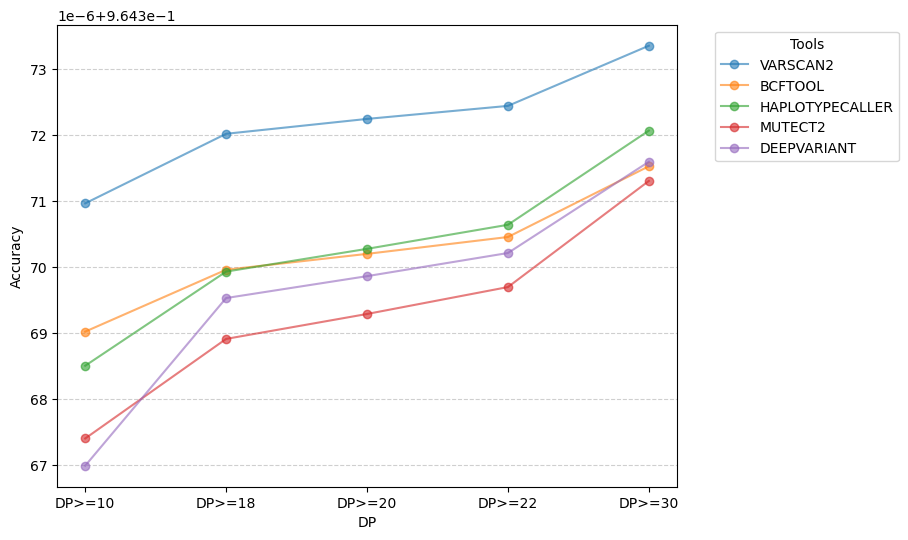

In [47]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"]
Accuracy = [
    [0.964370963, 0.964372015, 0.96437224, 0.964372437, 0.964373347],
    [0.964369023, 0.964369959, 0.964370199, 0.964370454, 0.964371524],
    [0.964368507, 0.964369931, 0.964370275, 0.964370639, 0.964372063],
    [0.964367407, 0.964368913, 0.96436929, 0.964369697, 0.964371302],
    [0.964366995, 0.964369531, 0.964369862, 0.964370212, 0.964371592]
]

# Create a single figure
plt.figure(figsize=(8, 6))

for i in range(len(sample_names)):
    # Plot a line for sensitivity with markers
    plt.plot(range(len(tools)), Accuracy[i], marker='o', label=f'{sample_names[i]}', alpha=0.6, linestyle='-')

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Accuracy')
plt.title('')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("Tools")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/new_input_sample/new_bwa_files/new_visualizations_03_11_2023/Accuracy_0.001_VAF_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

# All DP Precision

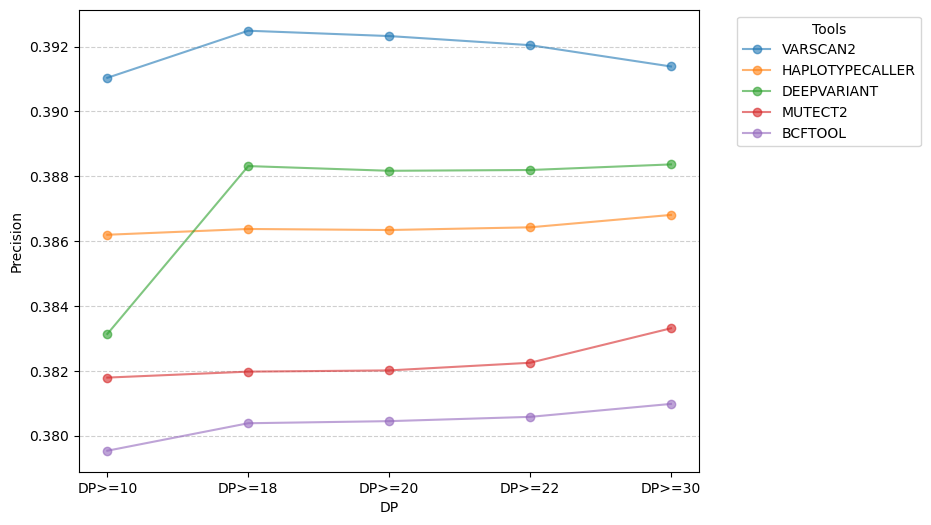

In [48]:
import matplotlib.pyplot as plt

# Data from the table
tools = ["DP>=10", "DP>=18", "DP>=20", "DP>=22", "DP>=30"]
sample_names = ["VARSCAN2", "HAPLOTYPECALLER", "DEEPVARIANT", "MUTECT2", "BCFTOOL"]
Precision = [
    [0.391039062, 0.392492247, 0.392327536, 0.392046911, 0.39138885],
    [0.386195935, 0.38637444, 0.386341938, 0.386425561, 0.38680773],
    [0.38313418, 0.388315208, 0.388170013, 0.388193893, 0.388366649],
    [0.381788449, 0.381971958, 0.382009953, 0.382245611, 0.38330962],
    [0.379531442, 0.380379495, 0.380444106, 0.380576321, 0.380975799]
]

# Create a single figure
plt.figure(figsize=(8, 6))

for i in range(len(sample_names)):
    # Plot a line for sensitivity with markers
    plt.plot(range(len(tools)), Precision[i], marker='o', label=f'{sample_names[i]}', alpha=0.6, linestyle='-')

# Add labels and a legend outside the plot
plt.xticks(range(len(tools)), tools)
plt.xlabel('DP')
plt.ylabel('Precision')
plt.title('')
legend = plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
legend.set_title("Tools")

# Show the plot
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.savefig(r'C:/Users/GenepoweRx_Madhu/Downloads/sen_spe_files_07_09_2023/VCC_input_files/new_input_sample/new_bwa_files/new_visualizations_03_11_2023/Precision_0.001_VAF_all_samples.png', dpi=450, bbox_inches='tight')
plt.show()

# Individual Sensitivity vs Specificity

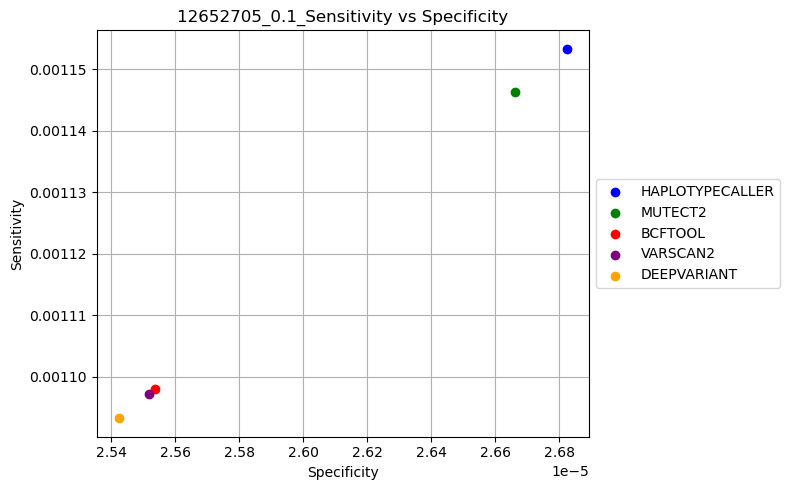

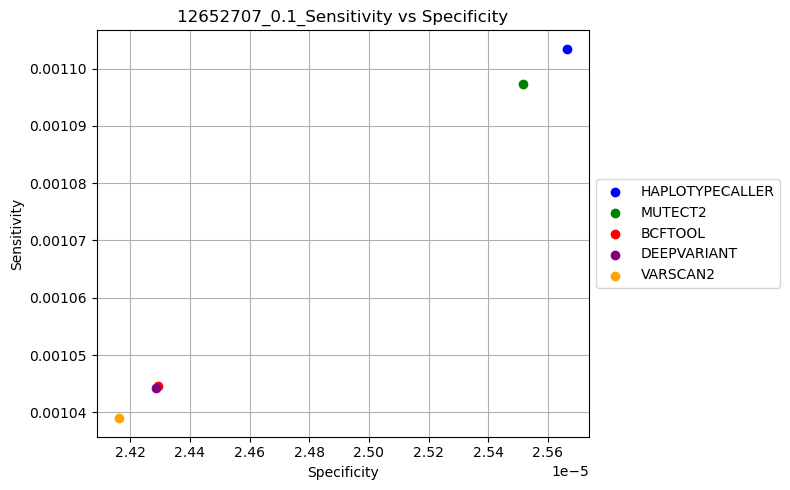

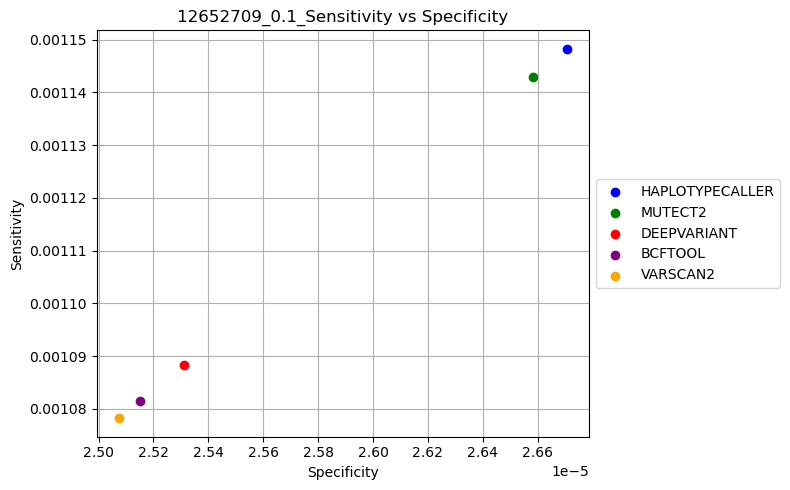

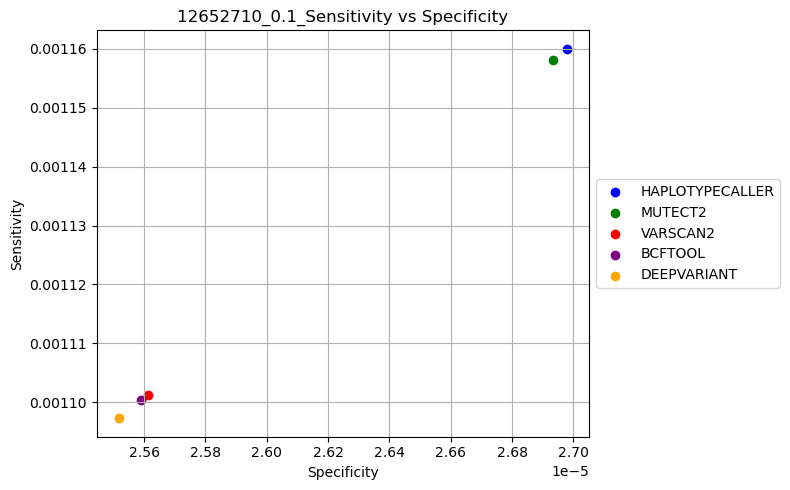

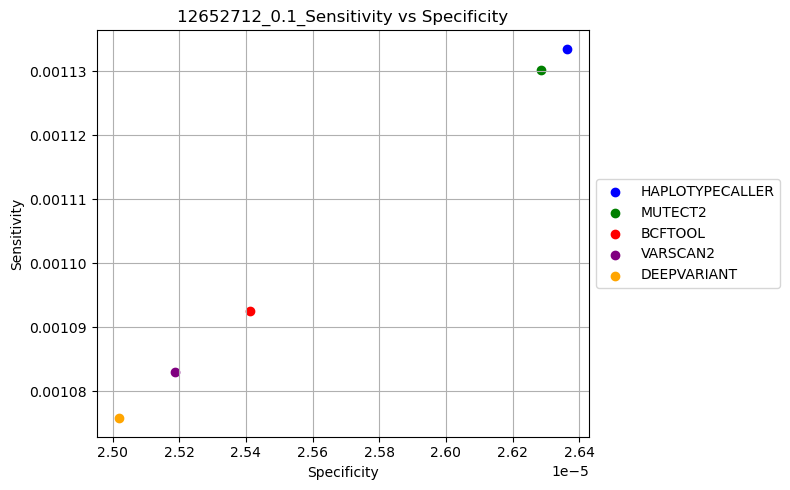

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = [
    [12652705, 'HAPLOTYPECALLER', 2.68226E-05, 0.001153321],
    [12652705, 'MUTECT2', 2.66602E-05, 0.001146335],
    [12652705, 'BCFTOOL', 2.55366E-05, 0.001098022],
    [12652705, 'VARSCAN2', 2.5517E-05, 0.001097181],
    [12652705, 'DEEPVARIANT', 2.5425E-05, 0.001093225],
    [12652707, 'HAPLOTYPECALLER', 2.56629E-05, 0.001103451],
    [12652707, 'MUTECT2', 2.5518E-05, 0.001097223],
    [12652707, 'BCFTOOL', 2.42946E-05, 0.001044617],
    [12652707, 'DEEPVARIANT', 2.42868E-05, 0.001044281],
    [12652707, 'VARSCAN2', 2.41634E-05, 0.001038978],
    [12652709, 'HAPLOTYPECALLER', 2.67052E-05, 0.001148271],
    [12652709, 'MUTECT2', 2.65809E-05, 0.001142926],
    [12652709, 'DEEPVARIANT', 2.53115E-05, 0.001088343],
    [12652709, 'BCFTOOL', 2.51529E-05, 0.001081525],
    [12652709, 'VARSCAN2', 2.50756E-05, 0.001078201],
    [12652710, 'HAPLOTYPECALLER', 2.69783E-05, 0.001160012],
    [12652710, 'MUTECT2', 2.69342E-05, 0.001158119],
    [12652710, 'VARSCAN2', 2.5612E-05, 0.001101263],
    [12652710, 'BCFTOOL', 2.55895E-05, 0.001100295],
    [12652710, 'DEEPVARIANT', 2.5519E-05, 0.001097265],
    [12652712, 'HAPLOTYPECALLER', 2.63626E-05, 0.001133541],
    [12652712, 'MUTECT2', 2.62843E-05, 0.001130175],
    [12652712, 'BCFTOOL', 2.54113E-05, 0.001092635],
    [12652712, 'VARSCAN2', 2.51862E-05, 0.001082956],
    [12652712, 'DEEPVARIANT', 2.50198E-05, 0.001075802]
]

df = pd.DataFrame(data, columns=['Sample', 'Tool', 'Specificity', 'Sensitivity'])

# Get unique samples
samples = df['Sample'].unique()

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through samples and create scatter plots
for sample in samples:
    sample_df = df[df['Sample'] == sample]
    plt.figure(figsize=(8, 5))
    for i in range(len(sample_df)):
        plt.scatter(sample_df["Specificity"].iloc[i], sample_df["Sensitivity"].iloc[i], color=colors[i], marker='o', label=sample_df["Tool"].iloc[i])
    plt.xlabel("Specificity")
    plt.ylabel("Sensitivity")
    plt.title(f"{sample}_0.1_Sensitivity vs Specificity")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/BWA_{sample}_0.1_Specificity_vs_Sensitivity.tiff', dpi=600, bbox_inches='tight')
    plt.show()

# Individual TPR vs FPR

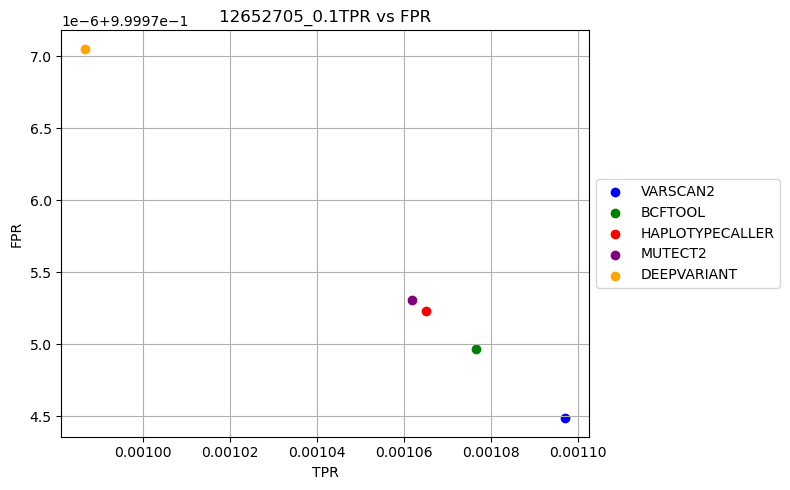

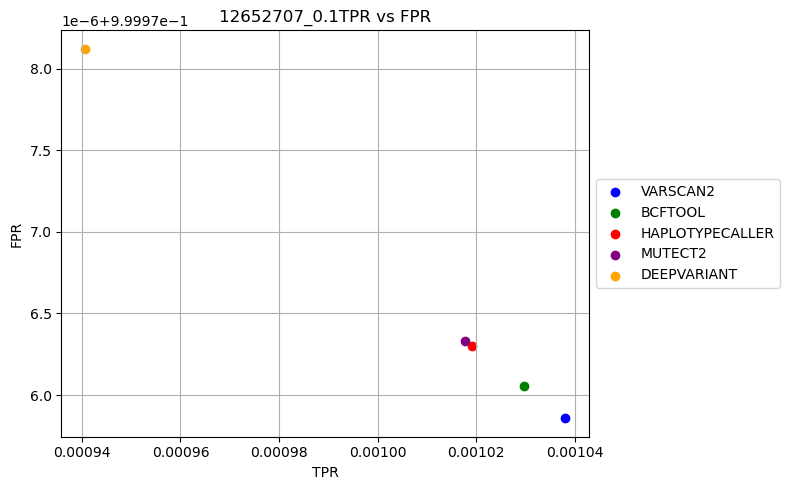

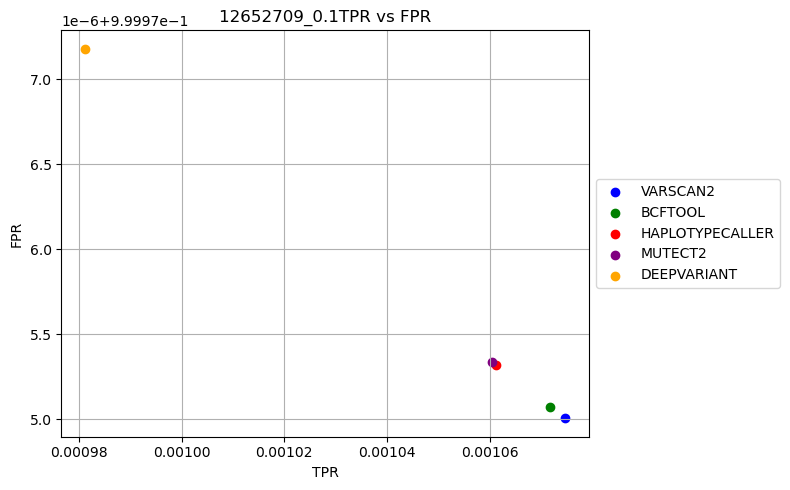

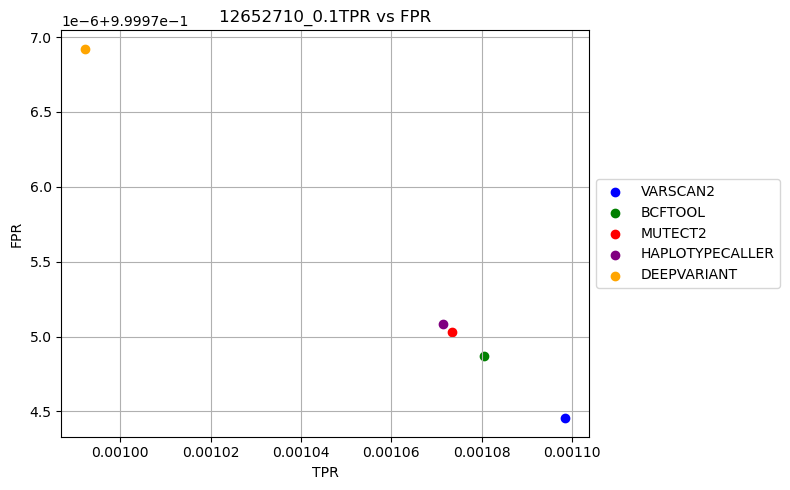

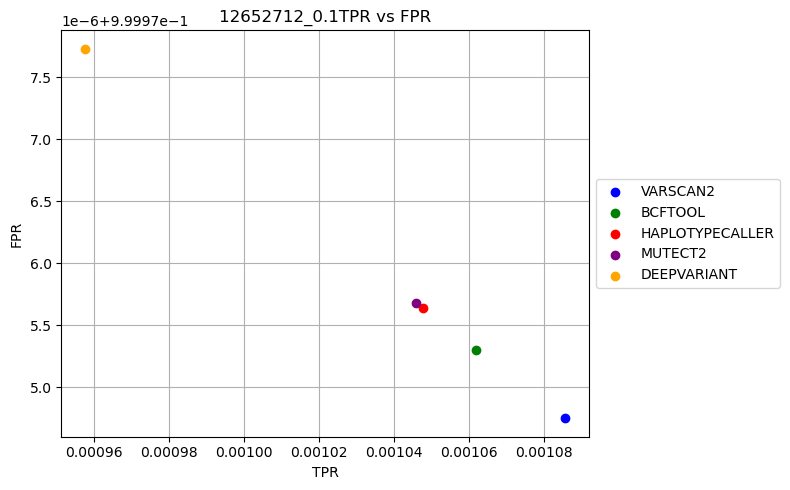

In [41]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data
data = {
    "Sample": [12652705, 12652705, 12652705, 12652705, 12652705, 12652707, 12652707, 12652707, 12652707, 12652707, 12652709, 12652709, 12652709, 12652709, 12652709, 12652710, 12652710, 12652710, 12652710, 12652710, 12652712, 12652712, 12652712, 12652712, 12652712],
    "Tool": ["VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "MUTECT2", "HAPLOTYPECALLER", "DEEPVARIANT", "VARSCAN2", "BCFTOOL", "HAPLOTYPECALLER", "MUTECT2", "DEEPVARIANT"],
    "TPR": [0.001097096, 0.001076559, 0.00106507, 0.00106183, 0.000986793, 0.001038052, 0.001029677, 0.001019114, 0.001017683, 0.000940711, 0.001074708, 0.001071804, 0.001061241, 0.001060399, 0.000981238, 0.001098443, 0.001080599, 0.001073529, 0.001071383, 0.000992306, 0.001085649, 0.001061914, 0.001047605, 0.001045796, 0.000957629],
    "FPR": [0.999974485, 0.999974963, 0.99997523, 0.999975305, 0.99997705, 0.999975858, 0.999976053, 0.999976299, 0.999976332, 0.999978122, 0.999975006, 0.999975073, 0.999975319, 0.999975338, 0.999977179, 0.999974454, 0.999974869, 0.999975033, 0.999975083, 0.999976922, 0.999974751, 0.999975303, 0.999975636, 0.999975678, 0.999977728]
}

df = pd.DataFrame(data)
# Get unique samples
samples = df['Sample'].unique()

# Define a list of colors to use for the data points
colors = ['blue', 'green', 'red', 'purple', 'orange']

# Loop through samples and create scatter plots
for sample in samples:
    sample_df = df[df['Sample'] == sample]
    plt.figure(figsize=(8, 5))
    for i in range(len(sample_df)):
        plt.scatter(sample_df["TPR"].iloc[i], sample_df["FPR"].iloc[i], color=colors[i], marker='o', label=sample_df["Tool"].iloc[i])
    plt.xlabel("TPR")
    plt.ylabel("FPR")
    plt.title(f"{sample}_0.1TPR vs FPR")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'C:/Users/GenepoweRx_Madhu/Downloads/COVERED_VCF_FILES_BED/visualizations_new/{sample}_0.1_TPR_vs_FPR.tiff', dpi=600, bbox_inches='tight')
    plt.show()